# HW-4

## Dataset-3 Hill-Valley Data Set


### In this dataset, each record represents 100 points on a two-dimensional graph. When plotted in order (from 1 through 100) as the Y co-ordinate, the points will create either a Hill (a “bump” in the terrain) or a Valley (a “dip” in the terrain). In the data set there are six files. Hill_Valley_without_noise_Training.data and Hill_Valley_without_noise_Testing.data are used in this homework.

### Features of Dataset
Data Set Characteristics: Sequential

Number of Instances:606

Attribute Characteristics:Real

Number of Attributes:101

Associated Tasks:Classification

### Attributes
1-100: Labeled “X##”. Floating point values (numeric)
101: Labeled “class”. Binary {0, 1} representing {valley, hill}



In [2]:
#used libraries
library(data.table)
library(Matrix)
library(tidyverse)
library(dplyr)
library(glmnet)
library(caret)
library(data.table)
require(lubridate)
library(forecast)
library(e1071)
library(rpart)
require(data.table)
require(lubridate)
require(caret)
library(gbm)
library(rpart.plot)

In [3]:
#Reading dataset
test_set1 = read.csv(file="C:/Users/OZGE/OneDrive - boun.edu.tr/doktora_ders/IE582/HW4/Hill_Valley_without_noise_Testing.data",header = TRUE, sep = ",")
train_set1 = read.csv(file="C:/Users/OZGE/OneDrive - boun.edu.tr/doktora_ders/IE582/HW4/Hill_Valley_without_noise_Training.data",header = TRUE, sep = ",")

test_set1 = as.data.frame(test_set1)
train_set1 = as.data.frame(train_set1)
#class is determined as factor
test_set1[,101] = as.factor(test_set1[,101])
train_set1[,101] = as.factor(train_set1[,101])

colnames(test_set1)[101] = "class"
colnames(train_set1)[101] = "class"

class_1_test = test_set1[,101]
class_1_train = train_set1[,101]


In [ ]:
x_train = train_set1[,1:100]
lasso_model = cv.glmnet(as.matrix(x_train) , class_1_train, family="binomial", nfolds = 10)
lasso_model

In [5]:
#Model 1 - Lasso Regression
#lambda is determined with 6 values according to lasso_model calculation
lambda_seq = c(0.011753470, 0.010709324, 0.009757937, 0.008891069, 0.008101211, 0.007381522)
train_set1=data.frame(train_set1)
set.seed(1)
n_repeats=5
n_folds=10
x_train = train_set1[,1:30]
lasso_grid = expand.grid(alpha=1,lambda=lambda_seq)
Control=trainControl(method = "repeatedcv",
                           number = n_folds,
                           repeats = n_repeats)                         
lassolr_fit = train(class~ .,data=train_set1,
                 method = "glmnet", 
                    family="binomial",
                 tuneGrid = lasso_grid,
                 trControl = Control) 

Warning message:
"from glmnet Fortran code (error code -57); Convergence for 57th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"Warning message:
"from glmnet Fortran code (error code -56); Convergence for 56th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"Warning message:
"from glmnet Fortran code (error code -55); Convergence for 55th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"Warning message:
"from glmnet Fortran code (error code -55); Convergence for 55th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"

In [6]:
summary(lassolr_fit)
lassolr_fit

            Length Class      Mode     
a0            56   -none-     numeric  
beta        5600   dgCMatrix  S4       
df            56   -none-     numeric  
dim            2   -none-     numeric  
lambda        56   -none-     numeric  
dev.ratio     56   -none-     numeric  
nulldev        1   -none-     numeric  
npasses        1   -none-     numeric  
jerr           1   -none-     numeric  
offset         1   -none-     logical  
classnames     2   -none-     character
call           5   -none-     call     
nobs           1   -none-     numeric  
lambdaOpt      1   -none-     numeric  
xNames       100   -none-     character
problemType    1   -none-     character
tuneValue      2   data.frame list     
obsLevels      2   -none-     character
param          1   -none-     list     

glmnet 

606 samples
100 predictors
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 546, 546, 546, 545, 545, 545, ... 
Resampling results across tuning parameters:

  lambda       Accuracy   Kappa        
  0.007381522  0.4983437  -0.0013445593
  0.008101211  0.5016386   0.0047139961
  0.008891069  0.4999501   0.0009106922
  0.009757937  0.5022944   0.0054905902
  0.010709324  0.5013219   0.0032048512
  0.011753470  0.4977042  -0.0054958701

Tuning parameter 'alpha' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were alpha = 1 and lambda = 0.009757937.

In [11]:
#accuracy of lasso model at alpha = 1 and lambda = 0.009757937
model_lasso_accuracy = 0.5022944


In [9]:
#Prediction with lasso
predict_lasso = predict(lassolr_fit, test_set1 )
cm = confusionMatrix(predict_lasso, test_set1$class)
cm

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  87  78
         1 208 233
                                          
               Accuracy : 0.5281          
                 95% CI : (0.4874, 0.5684)
    No Information Rate : 0.5132          
    P-Value [Acc > NIR] : 0.2449          
                                          
                  Kappa : 0.0446          
                                          
 Mcnemar's Test P-Value : 2.386e-14       
                                          
            Sensitivity : 0.2949          
            Specificity : 0.7492          
         Pos Pred Value : 0.5273          
         Neg Pred Value : 0.5283          
             Prevalence : 0.4868          
         Detection Rate : 0.1436          
   Detection Prevalence : 0.2723          
      Balanced Accuracy : 0.5221          
                                          
       'Positive' Class : 0               
                              

In [12]:
#Overall Accuracy
overall <- cm$overall
overall.accuracy <- overall['Accuracy'] 
comp_lasso = c()
comp_lasso[1] = as.numeric(model_lasso_accuracy)
comp_lasso[2]= as.numeric(overall.accuracy)
overall.kappa = overall['Kappa']
overall.pvalue = overall['AccuracyPValue']
comp_lasso[3] = as.numeric(overall.kappa)
comp_lasso[4] = as.numeric(overall.pvalue)

In [13]:
#Model 2- Decision Tree
set.seed(1)
n_repeats=5
n_folds=10
Control=trainControl(method = "repeatedcv",
                           number = n_folds,
                           repeats = n_repeats)
#complexity parameter is selected as 0.01, 0.03, 0.05
grid_tree = expand.grid(cp=c(0.01, 0.03, 0.05))
tree_fit_minbucket7 = train(class~ .,data=train_set1,
                 method = "rpart", 
                 trControl = Control,
                control = rpart.control(minbucket=7),
                tuneGrid = grid_tree)
tree_fit_minbucket10 = train(class~ .,data=train_set1,
                 method = "rpart", 
                 trControl = Control,
                control = rpart.control(minbucket=10),
                            tuneGrid = grid_tree)
tree_fit_minbucket5 = train(class~ .,data=train_set1,
                 method = "rpart", 
                 trControl = Control,
                control = rpart.control(minbucket=5),
                tuneGrid = grid_tree)

In [14]:
cat("Decision Tree Results @ minbucket=7")
tree_fit_minbucket7
cat("Decision Tree Results @ minbucket=5")
tree_fit_minbucket5
cat("Decision Tree Results @ minbucket=10")
tree_fit_minbucket10

Decision Tree Results @ minbucket=7

CART 

606 samples
100 predictors
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 546, 546, 546, 545, 545, 545, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa      
  0.01  0.5571324   0.11388544
  0.03  0.4942893  -0.01357847
  0.05  0.4917100  -0.02242155

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01.

Decision Tree Results @ minbucket=5

CART 

606 samples
100 predictors
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 546, 545, 545, 545, 546, 545, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa      
  0.01  0.5327649   0.06663908
  0.03  0.4891038  -0.02540808
  0.05  0.4969727  -0.01228624

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01.

Decision Tree Results @ minbucket=10

CART 

606 samples
100 predictors
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 545, 545, 546, 545, 546, 545, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa      
  0.01  0.5379508   0.07568725
  0.03  0.4838470  -0.03578346
  0.05  0.4897650  -0.02603637

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01.

In [15]:
#Accuracy of decision tree at cp = 0.01 and minbucket=7
model_tree_accuracy = 0.5571324

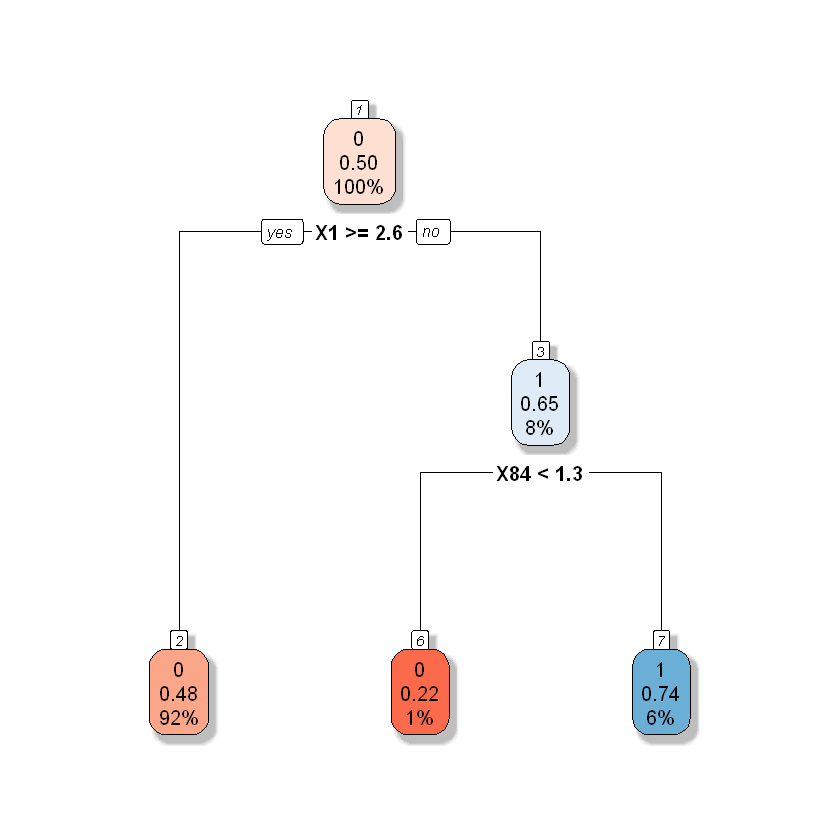

In [16]:
#Accuracy of the model when minbucket is equal to 7 is higher than the others.
rpart.plot(tree_fit_minbucket7$finalModel, box.palette="RdBu", shadow.col="gray", nn=TRUE)


In [17]:
#Accuracy of the model when minbucket is equal to 7 is higher than the others.
#For this reason this model is used to predict.
predict_tree = predict(tree_fit_minbucket7, test_set1 )
cm1 = confusionMatrix(predict_tree, test_set1$class)
cm1

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 269 293
         1  26  18
                                          
               Accuracy : 0.4736          
                 95% CI : (0.4332, 0.5142)
    No Information Rate : 0.5132          
    P-Value [Acc > NIR] : 0.9768          
                                          
                  Kappa : -0.0296         
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.91186         
            Specificity : 0.05788         
         Pos Pred Value : 0.47865         
         Neg Pred Value : 0.40909         
             Prevalence : 0.48680         
         Detection Rate : 0.44389         
   Detection Prevalence : 0.92739         
      Balanced Accuracy : 0.48487         
                                          
       'Positive' Class : 0               
                              

In [18]:
overall_1 <- cm1$overall
overall.accuracy_1 <- overall_1['Accuracy'] 
comp_tree = c()
comp_tree[1] = as.numeric(model_tree_accuracy)
comp_tree[2]= as.numeric(overall.accuracy_1)
overall.kappa_1 = overall_1['Kappa']
overall.pvalue_1 = overall_1['AccuracyPValue']
comp_tree[3] = as.numeric(overall.kappa_1)
comp_tree[4] = as.numeric(overall.pvalue_1)

In [19]:
# Model 3: Random Forest
set.seed(1)
n_folds=10
Control=trainControl(method = "cv",
                           number = n_folds)  
#the minimal number of observations per tree leaf is determined with different values.
#Normally, it is set to 5
grid_random_forest <- expand.grid(mtry = c(1,5,9,11,15)) 

rf_fit = train(class~ .,data=train_set1,
                 method = "rf", 
                 ntree=500,
                 nodesize=5,
                 trControl = Control,
                 tuneGrid = grid_random_forest)

Random Forest 

606 samples
100 predictors
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 546, 546, 546, 545, 545, 545, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa     
   1    0.5281421  0.05568301
   5    0.5643989  0.12831473
   9    0.5692350  0.13796396
  11    0.5593169  0.11817655
  15    0.5709563  0.14159198

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 15.

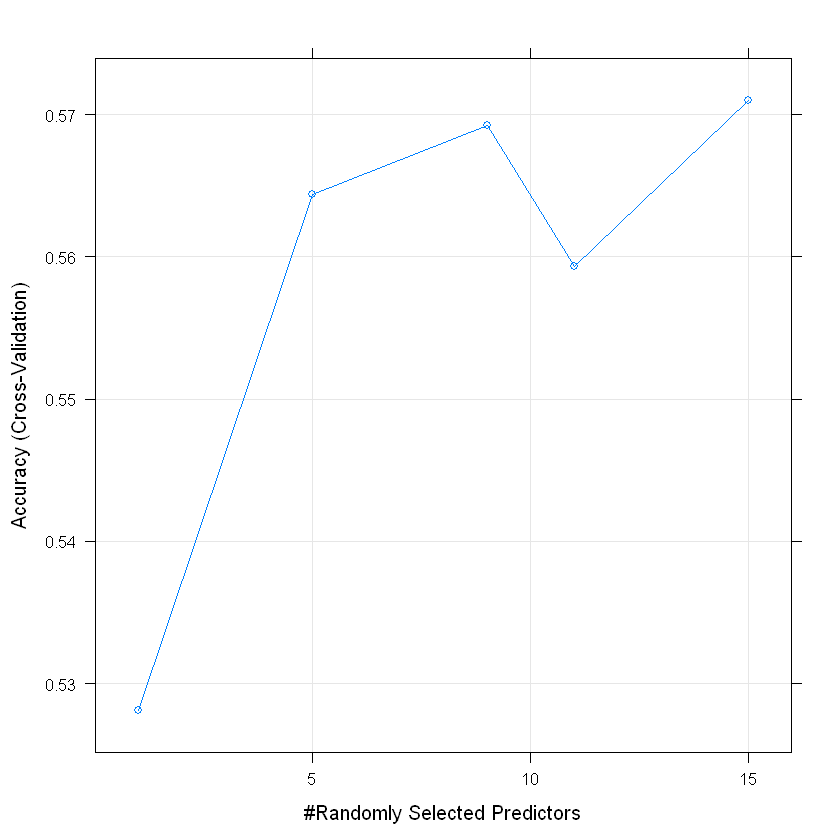

In [20]:
rf_fit
plot(rf_fit)

In [21]:
#Accuracy of random forest at mtry=15
model_forest_accuracy = 0.5709563

In [23]:
#Prediction by using random forests method
predict_forest = predict(rf_fit, test_set1 )
cm_2 = confusionMatrix(predict_forest, test_set1$class)
overall_2 <- cm_2$overall
overall.accuracy_2 <- overall_2['Accuracy'] 
comp_forest = c()
comp_forest[1] = as.numeric(model_forest_accuracy)
comp_forest[2]= as.numeric(overall.accuracy_2)
overall.kappa_2 = overall_2['Kappa']
overall.pvalue_2 = overall_2['AccuracyPValue']
comp_forest[3] = as.numeric(overall.kappa_2)
comp_forest[4] = as.numeric(overall.pvalue_2)

In [24]:
# Model 4: Stochastic Gradient Boosting
set.seed(1)
n_folds=10
Control=trainControl(method = "cv",
                           number = n_folds)  
#Number of trees are set to 200, 400 and 600
#Interaction depth is set to 1, 3, and 5
#Learning rate is et to 0.001,0.01,0.1
#minobsinnode is set to 10 to avoid underfitting
grid_sgb <- expand.grid(n.trees = c(200,400,600), interaction.depth =c(1,3,5),shrinkage = c(0.001,0.01,0.1),n.minobsinnode = 10) 

sgb_fit = train(class~ .,data=train_set1,
                method = 'gbm',
                 trControl = Control,
                 tuneGrid = grid_sgb)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3862             nan     0.0010   -0.0000
     2        1.3862             nan     0.0010    0.0000
     3        1.3862             nan     0.0010   -0.0000
     4        1.3861             nan     0.0010   -0.0000
     5        1.3861             nan     0.0010    0.0000
     6        1.3861             nan     0.0010    0.0000
     7        1.3861             nan     0.0010    0.0000
     8        1.3861             nan     0.0010   -0.0000
     9        1.3860             nan     0.0010    0.0000
    10        1.3860             nan     0.0010    0.0000
    20        1.3858             nan     0.0010    0.0000
    40        1.3854             nan     0.0010    0.0000
    60        1.3850             nan     0.0010   -0.0000
    80        1.3847             nan     0.0010   -0.0000
   100        1.3843             nan     0.0010   -0.0000
   120        1.3839             nan     0.0010   -0.0000
   140        

In [25]:
sgb_fit

Stochastic Gradient Boosting 

606 samples
100 predictors
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 546, 546, 546, 545, 545, 545, ... 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.trees  Accuracy   Kappa        
  0.001      1                  200      0.5016667  -0.0008089482
  0.001      1                  400      0.4998634  -0.0025759045
  0.001      1                  600      0.4933333  -0.0145768529
  0.001      3                  200      0.4818306  -0.0366590849
  0.001      3                  400      0.4932787  -0.0132056952
  0.001      3                  600      0.5081148   0.0164495814
  0.001      5                  200      0.5016393   0.0033107955
  0.001      5                  400      0.4982514  -0.0032025508
  0.001      5                  600      0.5031148   0.0064125135
  0.010      1                  200      0.4998907  -0.0010053182
  0.010      1               

In [26]:
#Accuracy of sgb at n.trees = 400, interaction.depth =5, shrinkage = 0.1 and n.minobsinnode = 10
model_forest_accuracy = 0.5196175

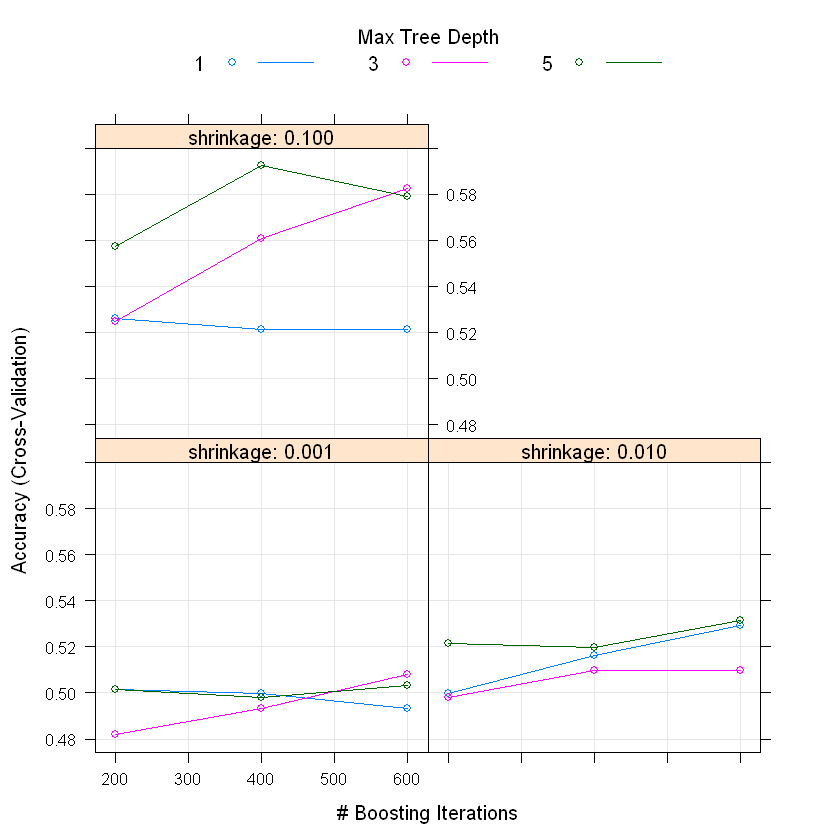

In [27]:
plot(sgb_fit)

In [30]:
#Prediction by using Stochastic Gradient Boosting
predict_sgb = predict(sgb_fit, test_set1 )
confusionMatrix(predict_sgb, test_set1$class)
cm_3 = confusionMatrix(predict_sgb, test_set1$class)
overall_3 <- cm_3$overall
overall.accuracy_3 <- overall_3['Accuracy'] 
comp_sgb = c()
comp_sgb[1]=as.numeric(model_forest_accuracy)
comp_sgb[2]= as.numeric(overall.accuracy_3)
overall.kappa_3 = overall_3['Kappa']
overall.pvalue_3 = overall_3['AccuracyPValue']
comp_sgb[3] = as.numeric(overall.kappa_3)
comp_sgb[4] = as.numeric(overall.pvalue_3)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 172 138
         1 123 173
                                          
               Accuracy : 0.5693          
                 95% CI : (0.5288, 0.6091)
    No Information Rate : 0.5132          
    P-Value [Acc > NIR] : 0.003192        
                                          
                  Kappa : 0.1391          
                                          
 Mcnemar's Test P-Value : 0.386173        
                                          
            Sensitivity : 0.5831          
            Specificity : 0.5563          
         Pos Pred Value : 0.5548          
         Neg Pred Value : 0.5845          
             Prevalence : 0.4868          
         Detection Rate : 0.2838          
   Detection Prevalence : 0.5116          
      Balanced Accuracy : 0.5697          
                                          
       'Positive' Class : 0               
                              

In [31]:
#Model Comparison
model = c()
model[1] = "Penalized Regression Approaches (PRA)"
model[2] = "Decision Trees (DT)"
model[3] = "Random Forests (RF)"
model[4] = "Stochastic Gradient Boosting (SGB)"
data=matrix(0,4,5)
data[,1] = t(model)
data[1,2:5] = signif(comp_lasso,digits = 4)
data[2,2:5] = signif(comp_tree, digits =4)
data[3,2:5] = signif(comp_forest, digits =4)
data[4,2:5] = signif(comp_sgb, digits=4)
colnames(data) = c('Model','Accuracy of Model', 'Accuracy Calculated from Confusion Matrix', 'Kappa Calculated from Confusion Matrix',  'P-value Calculated from Confusion Matrix')

In [32]:
data

Model,Accuracy of Model,Accuracy Calculated from Confusion Matrix,Kappa Calculated from Confusion Matrix,P-value Calculated from Confusion Matrix
Penalized Regression Approaches (PRA),0.5023,0.5281,0.04462,0.2449
Decision Trees (DT),0.5571,0.4736,-0.02957,0.9768
Random Forests (RF),0.571,0.5611,0.1218,0.01019
Stochastic Gradient Boosting (SGB),0.5196,0.5693,0.1391,0.003192


### In terms of accuracy of model, random forest has highest accuracy.Since random forest enables the model to be randomness, while growing trees and its searching algorithm focuses on the random subset of features, it gives high accuracy results. However, in this dataset the accuracy values neat 0.50, which is a low value in terms of accuracy.  For this reason, stochastic gradient boosting approach has highest accuracy when the predicted values are compared with the test data. SGB method is better than other methods in training weak models, since boosted trees are grown sequentially. In SGB model, learning rate with 0.01 value has the smallest RMSE value. Normally, learning rate is in between 0.001 and 0.3. Small values of of learning rate make model rebust, however in this model learnin rate is avarage. 